# Imports

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import torch
from torch_geometric.data import TemporalData
import pathpyG as pp
import ast
import pickle
import numpy as np
import Temporal_Metrics as tm
import importlib
from pandas import Timestamp
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from datetime import datetime

# Load Clean

In [197]:
jets = pd.read_pickle('Datasets\Jets-Final.pkl')

jets

,Date,Departure,Arrival,Distance (Miles),Flight Time (Mins),Fuel (Gallons),Carbon Emissions (Metric Tons),Celebrity,Departure Code,Arrival Code
0,2023-08-26,Hollywood Burbank Airport,Nashville International Airport,1790,295,1500,20,Taylor Swift,BUR,BNA
1,2023-07-24,Paine Field Airport,Nashville International Airport,1938,250,1100,15,Taylor Swift,PAE,BNA
2,2023-07-28,Nashville International Airport,San Jose International Airport,1981,249,1000,13,Taylor Swift,BNA,SJC
3,2023-07-30,San Jose International Airport,Nashville International Airport,1864,238,1300,17,Taylor Swift,SJC,BNA
4,2023-08-02,Nashville International Airport,Hollywood Burbank Airport,1697,227,1000,14,Taylor Swift,BNA,BUR
...,...,...,...,...,...,...,...,...,...,...
1264,2023-12-13,Camarillo Airport,Van Nuys Airport,40,44,370,4,Kim Kardashian,CMA,VNY
1265,2023-07-31,Van Nuys Airport,Los Angeles International Airport,20,44,370,4,Kim Kardashian,VNY,LAX
1266,2023-07-27,Camarillo Airport,Van Nuys Airport,40,44,370,4,Kim Kardashian,CMA,VNY
1267,2023-04-30,Van Nuys Airport,McCarran International Airport,230,43,360,4,Kim Kardashian,VNY,LAS


In [169]:
#get the min date
min_date = jets['Date'].min()
min_date

Timestamp('2023-01-02 00:00:00')

In [22]:
jets.describe(include='all', datetime_is_numeric = True).iloc[:3]

,Date,Departure,Arrival,Distance (Miles),Flight Time (Mins),Fuel (Gallons),Carbon Emissions (Metric Tons),Celebrity,Departure Code,Arrival Code
count,1263,1263,1263,1263.0,1263.0,1263.0,1263.0,1263,1263,1263
unique,NaN,239,242,NaN,NaN,NaN,NaN,10,239,242
top,NaN,La Guardia Airport,La Guardia Airport,NaN,NaN,NaN,NaN,Michael Bloomberg Plane 2,LGA,LGA


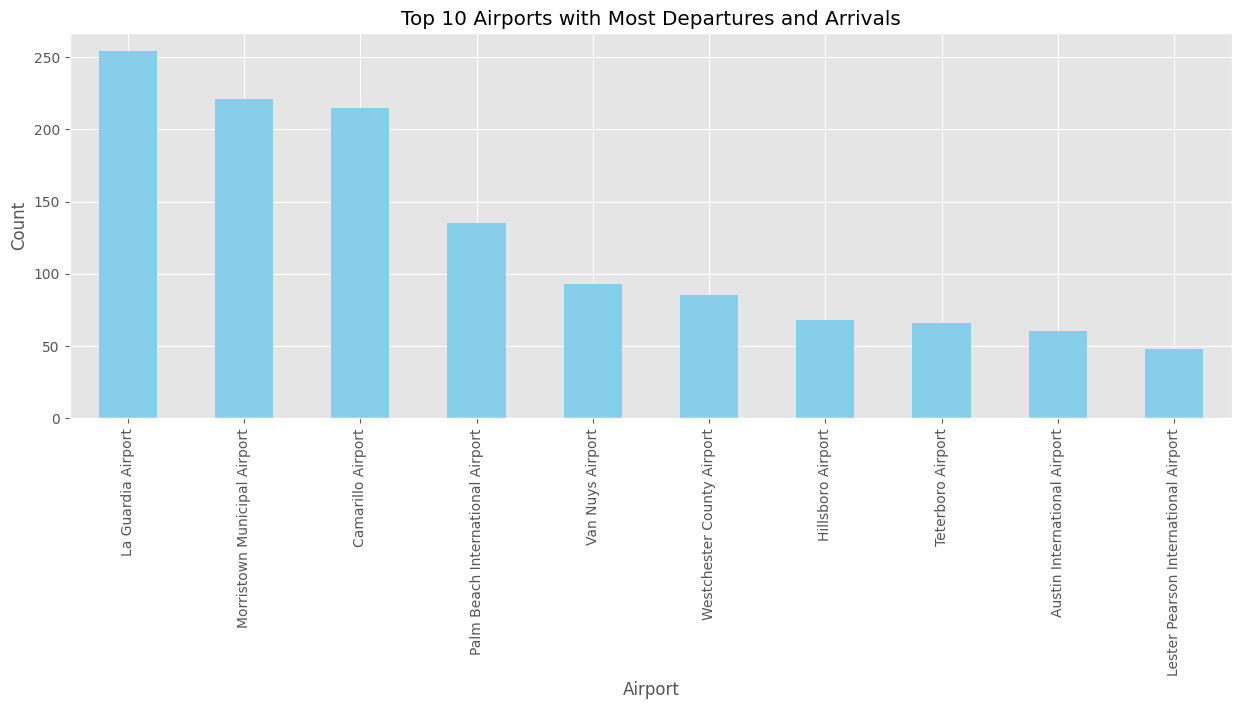

In [193]:
# Get the count of departure and arrivals combined
airports = pd.concat([jets['Departure'], jets['Arrival']]).value_counts().head(10)

# Plot the count of departure and arrivals combined
airports.plot(kind='bar', figsize=(15, 5), color='skyblue', xlabel='Airport', ylabel='Count', title='Top 10 Airports with Most Departures and Arrivals');

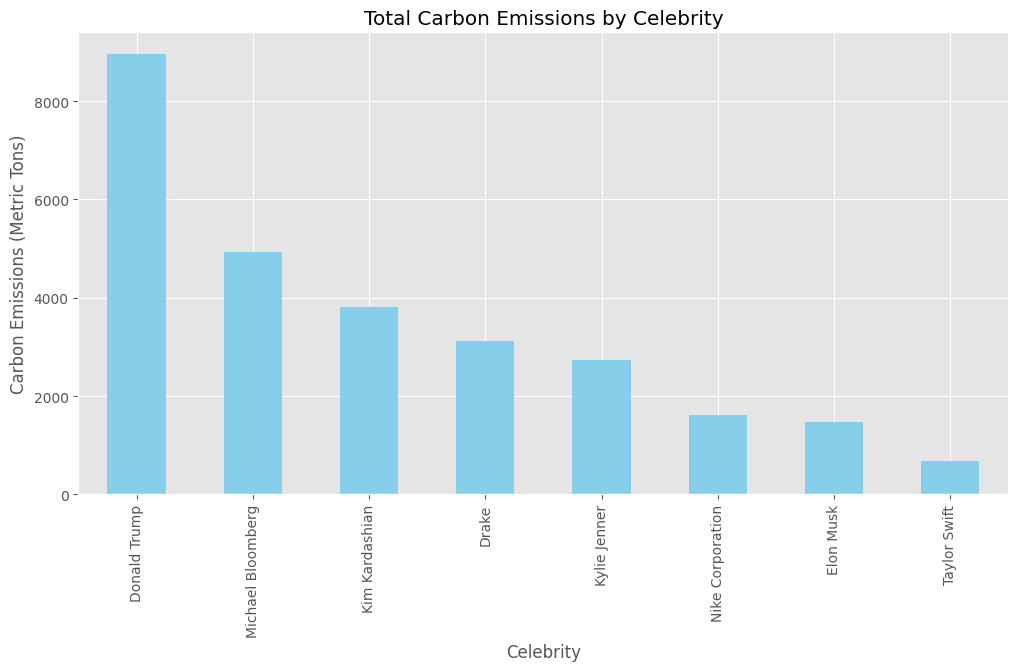

In [192]:
#Aggregate the carbon emissions by celebrity
celebrity_emissions = jets.groupby('Celebrity')['Carbon Emissions (Metric Tons)'].sum().sort_values(ascending=False)

#plot the carbon emissions by celebrity
celebrity_emissions.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Total Carbon Emissions by Celebrity', ylabel='Carbon Emissions (Metric Tons)');

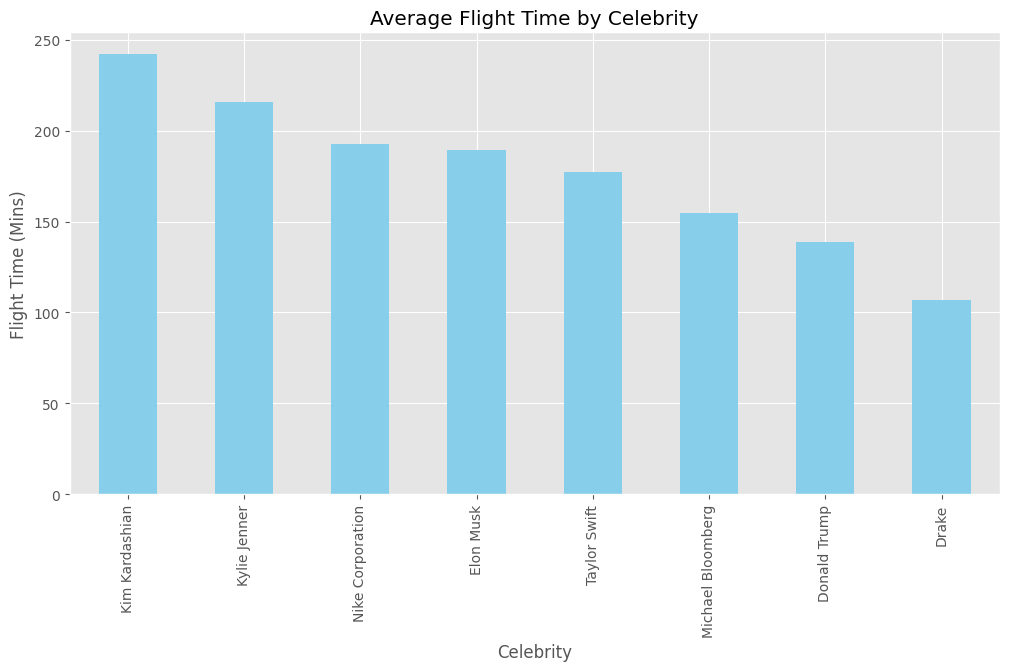

In [191]:
#Get the average flight time per celebrity
celebrity_flight_time = jets.groupby('Celebrity')['Flight Time (Mins)'].mean().sort_values(ascending=False)

#plot the average flight time per celebrity
celebrity_flight_time.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Average Flight Time by Celebrity', ylabel='Flight Time (Mins)');

In [6]:

# jets = jets[jets['Celebrity'].str.contains('Taylor Swift')].copy()
min_d = jets['Date'].min()
max_d = jets['Date'].max()
num_days = (max_d - min_d).days
jets.loc[:, 'day_number'] = (jets['Date'] - min_d).dt.days + 1
jets.loc[:, 'day_number'] = jets.groupby('day_number').ngroup() + 1

color_mapping = {
    value: 'red' if value == 'Taylor Swift Plane 1' or value == 'Taylor Swift Plane 2' 
    else 'green' if value == 'Elon Musk' 
    else 'blue' if value == 'Donald Trump' 
    else 'yellow' if value == 'Michael Bloomberg Plane 1' or value == 'Michael Bloomberg Plane 2'
    else 'purple' if value == 'Nike Corporation' 
    else 'orange' if value == 'Drake' 
    else 'pink' if value == 'Kylie Jenner' 
    else 'brown' if value == 'Kim Kardashian' 
    else 'white' for value in jets['Celebrity'].unique()
}


jets['color'] = jets['Celebrity'].map(color_mapping)
jets = jets.sort_values(by='day_number')


colours = jets['color'].values.tolist()
jets

,Date,Departure,Arrival,Distance (Miles),Flight Time (Mins),Fuel (Gallons),Carbon Emissions (Metric Tons),Celebrity,Departure Code,Arrival Code,day_number,color
756,2023-01-02,Cork Airport,Hillsboro Airport,4700,541,4500,45,Nike Corporation,ORK,HIO,1,purple
434,2023-01-02,Westchester County Airport,Morristown Municipal Airport,40,57,290,4,Michael Bloomberg Plane 1,HPN,MMU,1,yellow
1008,2023-01-02,Garfield County Regional Airport,Camarillo Airport,730,104,920,10,Kylie Jenner,RIL,CMA,1,pink
117,2023-01-03,Hollywood Burbank Airport,Austin International Airport,1289,132,1200,12,Elon Musk,BUR,AUS,2,green
97,2023-01-03,Austin International Airport,Oakland International Airport,1540,195,1500,15,Elon Musk,AUS,OAK,2,green
...,...,...,...,...,...,...,...,...,...,...,...,...
426,2024-05-27,La Guardia Airport,Morristown Municipal Airport,30,58,290,4,Michael Bloomberg Plane 1,LGA,MMU,453,yellow
523,2024-05-27,Charles Schulz Sonoma County Airport,Morristown Municipal Airport,2500,357,1800,24,Michael Bloomberg Plane 2,STS,MMU,453,yellow
415,2024-05-27,Laurence Hanscom Field Airport,La Guardia Airport,180,71,360,5,Michael Bloomberg Plane 1,BED,LGA,453,yellow
486,2024-05-28,Morristown Municipal Airport,Westchester County Airport,40,45,230,3,Michael Bloomberg Plane 1,MMU,HPN,454,yellow


# NetworkX

In [199]:
jets2 = jets[jets['Celebrity']=='Taylor Swift'].copy()
jets2

,Date,Departure,Arrival,Distance (Miles),Flight Time (Mins),Fuel (Gallons),Carbon Emissions (Metric Tons),Celebrity,Departure Code,Arrival Code
0,2023-08-26,Hollywood Burbank Airport,Nashville International Airport,1790,295,1500,20,Taylor Swift,BUR,BNA
1,2023-07-24,Paine Field Airport,Nashville International Airport,1938,250,1100,15,Taylor Swift,PAE,BNA
2,2023-07-28,Nashville International Airport,San Jose International Airport,1981,249,1000,13,Taylor Swift,BNA,SJC
3,2023-07-30,San Jose International Airport,Nashville International Airport,1864,238,1300,17,Taylor Swift,SJC,BNA
4,2023-08-02,Nashville International Airport,Hollywood Burbank Airport,1697,227,1000,14,Taylor Swift,BNA,BUR
...,...,...,...,...,...,...,...,...,...,...
56,2023-12-03,Kansas City International Airport,Green Bay International Airport,490,110,590,7,Taylor Swift,MCI,GRB
57,2023-11-21,Galeao Antonio Carlos Jobim Airport,Guarulhos Airport,210,78,420,5,Taylor Swift,GIG,GRU
58,2024-05-04,Stansted Airport,Charles De Gaulle Airport,230,75,400,5,Taylor Swift,STN,CDG
59,2023-12-03,Green Bay International Airport,Kansas City International Airport,490,73,390,5,Taylor Swift,GRB,MCI


In [150]:
G = nx.MultiDiGraph()

# create a temporal network
for index, row in jets.iterrows():
    G.add_node(row['Departure Code'], location=row['Departure'])
    G.add_node(row['Arrival Code'], location=row['Arrival'])
    # Add an edge with attributes
    G.add_edge(row['Departure Code'], row['Arrival Code'], time=row['Date'],
               flight_time=row['Flight Time (Mins)'], fuel=row['Fuel (Gallons)'],
               emissions=row['Carbon Emissions (Metric Tons)'])

print(G)

MultiDiGraph with 252 nodes and 1263 edges


In [145]:
importlib.reload(tm)

degree = pd.Series(tm.temporal_degree(G)).sort_values(ascending=False)
betweenness = pd.Series(tm.temporal_betweenness(G)).sort_values(ascending=False)
closeness = pd.Series(tm.temporal_closeness(G)).sort_values(ascending=False)

df_metrics = pd.DataFrame({
    'Degree': degree,
    'Betweenness': betweenness,
    'Closeness': closeness
})




,Degree,Betweenness,Closeness
ILG,1.0,0.000223,5.923575e-10
RIL,11.0,0.014020,5.911542e-10
CMA,106.0,0.142745,5.909653e-10
YYZ,24.0,0.027538,5.909285e-10
VNY,48.0,0.041371,5.909283e-10
CEC,1.0,0.000000,5.909198e-10
BUR,12.0,0.012781,5.908082e-10
AUS,31.0,0.059522,5.908058e-10
OAK,12.0,0.008114,5.908052e-10
TEB,32.0,0.017553,5.907445e-10


In [156]:
df_metrics['Closeness'].sort_values(ascending=False).head(10)

ILG    5.923575e-10
RIL    5.911542e-10
CMA    5.909653e-10
YYZ    5.909285e-10
VNY    5.909283e-10
CEC    5.909198e-10
BUR    5.908082e-10
AUS    5.908058e-10
OAK    5.908052e-10
TEB    5.907445e-10
Name: Closeness, dtype: float64

In [148]:
df_metrics.mean().sort_values(ascending=False)

Degree         5.284519e+00
Betweenness    5.072029e-03
Closeness      5.568902e-10
dtype: float64

# Slice Plot Graph

In [253]:
jets2 = jets[jets['Celebrity'] == 'Taylor Swift'].copy().iloc[:10]
jets2

,Date,Departure,Arrival,Distance (Miles),Flight Time (Mins),Fuel (Gallons),Carbon Emissions (Metric Tons),Celebrity,Departure Code,Arrival Code
0,2023-08-26,Hollywood Burbank Airport,Nashville International Airport,1790,295,1500,20,Taylor Swift,BUR,BNA
1,2023-07-24,Paine Field Airport,Nashville International Airport,1938,250,1100,15,Taylor Swift,PAE,BNA
2,2023-07-28,Nashville International Airport,San Jose International Airport,1981,249,1000,13,Taylor Swift,BNA,SJC
3,2023-07-30,San Jose International Airport,Nashville International Airport,1864,238,1300,17,Taylor Swift,SJC,BNA
4,2023-08-02,Nashville International Airport,Hollywood Burbank Airport,1697,227,1000,14,Taylor Swift,BNA,BUR
5,2023-08-11,Hollywood Burbank Airport,Nashville International Airport,1715,226,910,12,Taylor Swift,BUR,BNA
6,2023-07-22,Nashville International Airport,Paine Field Airport,1919,225,970,13,Taylor Swift,BNA,PAE
7,2023-03-24,Nashville International Airport,McCarran International Airport,1590,225,1100,15,Taylor Swift,BNA,LAS
8,2023-08-19,Hollywood Burbank Airport,Nashville International Airport,1697,222,880,12,Taylor Swift,BUR,BNA
9,2023-08-16,Nashville International Airport,Hollywood Burbank Airport,1822,217,880,12,Taylor Swift,BNA,BUR


In [254]:
t = nx.MultiDiGraph()

# create a temporal network
for index, row in jets2.iterrows():
    t.add_node(row['Departure Code'], location=row['Departure'])
    t.add_node(row['Arrival Code'], location=row['Arrival'])
    # Add an edge with attributes
    t.add_edge(row['Departure Code'], row['Arrival Code'], time=row['Date'])
    

print(t)


MultiDiGraph with 5 nodes and 10 edges


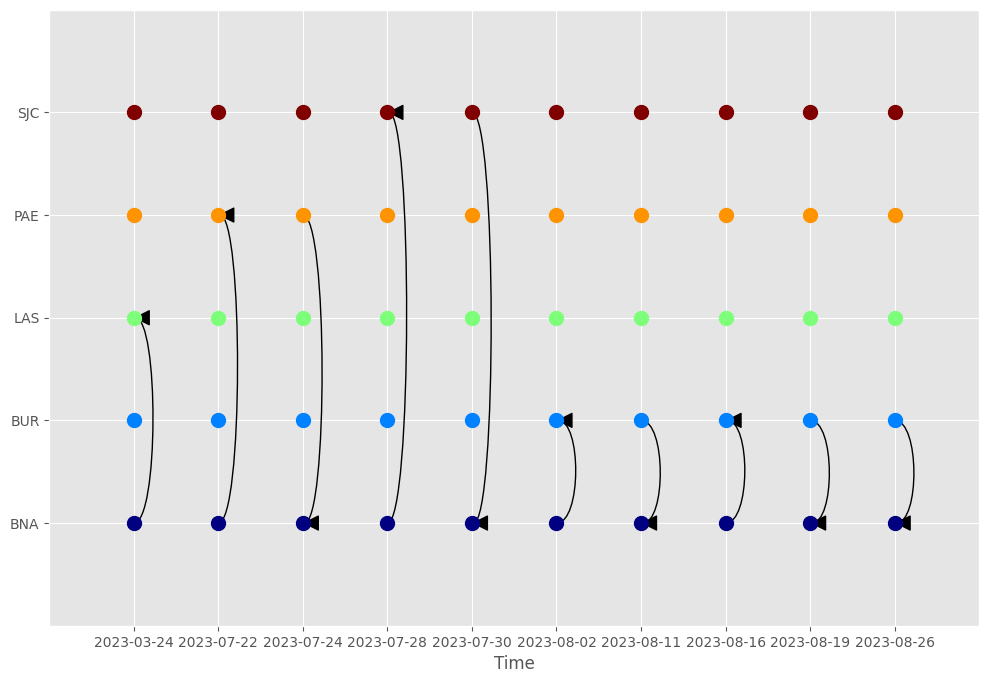

In [255]:
from matplotlib.patches import FancyArrowPatch

# Extract edges from the graph
temporal_edges = [(u, v, d['time']) for u, v, d in t.edges(data=True)]

# Extract unique nodes and time points
nodes = sorted(t.nodes())
time_points = sorted(set(edge[2]['time'] for edge in t.edges(data=True)))

# Create node positions
node_positions = {node: i for i, node in enumerate(nodes)}
time_positions = {time: i for i, time in enumerate(time_points)}

# Initialize plot
fig, ax = plt.subplots(figsize=(12, 8))

# Draw nodes
color_map = plt.cm.jet(np.linspace(0, 1, len(nodes)))
for node, node_idx in node_positions.items():
    for time, time_idx in time_positions.items():
        ax.plot(time_idx, node_idx, 'o', color=color_map[node_idx], markersize=10)

# Draw Bezier curves for edges
for edge in temporal_edges:
    node1, node2, time = edge
    x1, y1 = time_positions[time], node_positions[node1]
    x2, y2 = time_positions[time], node_positions[node2]

    
    # Create the curve bending to the right
    control_point_1 = (x1 + 0.3, y1)
    control_point_2 = (x2 + 0.3, y2)
    verts = [(x1, y1), control_point_1, control_point_2, (x2, y2)]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
    
    path = Path(verts, codes)

    if t.is_directed():
        patch = FancyArrowPatch(path=path, color='black', lw=1, arrowstyle='-|>', mutation_scale=25)
    else:
        patch = PathPatch(path, facecolor='none', edgecolor='black', lw=1)
    ax.add_patch(patch)

# Customize plot
ax.set_xlim(-1, len(time_points))
ax.set_ylim(-1, len(nodes))
ax.set_xticks(range(len(time_points)))
# ax.set_xticklabels([tp for tp in time_points])
ax.set_xticklabels([tp.strftime('%Y-%m-%d') for tp in time_points])
ax.set_xlabel('Time')
ax.set_yticks(range(len(nodes)))
ax.set_yticklabels(nodes)
ax.grid(True)

plt.show()


# Pathpy (Not Fully Working)

In [11]:
pp.config['torch']['device'] = 'cpu'

In [12]:
#make an edge list
edges = []
for index, row in jets2.iterrows():
    edges.append([row['Departure'], row['Arrival'], row['day_number']])
# edges
t = pp.TemporalGraph.from_edge_list(edges)

print(t)

Temporal Graph with 252 nodes, 712 unique edges and 1263 events in [1.0, 455.0]

Graph attributes
	src		<class 'torch.Tensor'> -> torch.Size([1263])
	dst		<class 'torch.Tensor'> -> torch.Size([1263])
	t		<class 'torch.Tensor'> -> torch.Size([1263])



c:\Users\izzfa\anaconda3\envs\thesis\lib\site-packages\torch_geometric\data\storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'src', 'dst', 't'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


In [ ]:
style = {}
style['edge_color'] = colours
pp.plot(t, **style, node_label = [str(t.mapping.to_id(i)) for i in range(t.N)], delta = 1000)


In [ ]:
dag = pp.algorithms.temporal_graph_to_event_dag(t, delta=1, create_mapping=True)

bc = pp.algorithms.centrality.closeness_centrality(dag)
# Convert keys and values to lists
keys = list(bc.keys())
values = list(bc.values())

# Create DataFrame
df = pd.DataFrame(keys, columns=['Source', 'Target', 'Time'])
df['Closeness Centrality'] = values

# pp.plot(dag, node_label = [str(dag.mapping.to_id(i)) for i in range(dag.N)])
df.sort_values(by='Closeness Centrality', ascending=False)


In [ ]:
m = pp.MultiOrderModel.from_temporal_graph(t, delta=1, max_order=4)

pp.plot(m.layers[1], node_label=[v for v in m.layers[1].nodes])

In [ ]:
pp.plot(m.layers[2], node_label=[v for v in m.layers[2].nodes])